Code to plot the graph 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

Goal: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).


Input(x) = movie review

Output(y) = sentiment

## Importing Data 

In [2]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

df_review_table = pd.read_csv("IMDB Dataset.csv")
df_review_table

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Obtaining 10,000 entries to train the model faster

In [3]:
df_positive = df_review_table[df_review_table['sentiment']=='positive'][:9000]
df_negative = df_review_table[df_review_table['sentiment']=='negative'][:1000]

df_imdb_review = pd.concat([df_positive,df_negative])
df_imdb_review = pd.DataFrame(df_imdb_review)
df_imdb_review['sentiment'].value_counts()

positive    9000
negative    1000
Name: sentiment, dtype: int64

## To observe the distribution of DataSet which is Imbalanced

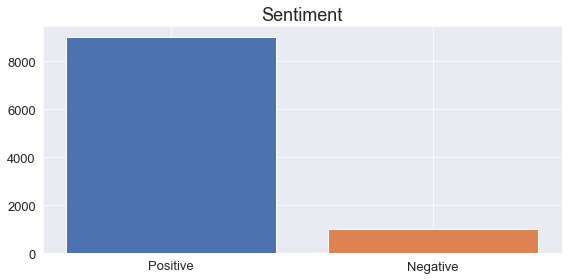

In [4]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_imdb_review['sentiment'].value_counts(),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

## Dealing with Imbalanced Dataset

In [5]:
length_negative = len(df_imdb_review[df_imdb_review['sentiment']=='negative'])

df_review_positive = df_imdb_review[df_imdb_review['sentiment']=='positive'].sample(n=length_negative)

df_review_non_positive = df_imdb_review[~(df_imdb_review['sentiment']=='positive')]

df_review = pd.concat([
    df_review_positive, df_review_non_positive
])

df_review['sentiment'].value_counts()

df_review.reset_index(drop=True, inplace=True)

df_review

,review,sentiment
0,"""The Aristocats"" is classic Disney at it's bes...",positive
1,"Yes, the cameras were in the right place at th...",positive
2,I was 15 years old when this movie premiered o...,positive
3,"In this swimming pool, this pond, there are wa...",positive
4,I don't pretend to be an authority on actors w...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


In [6]:
print(df_imdb_review['sentiment'].value_counts())
print(df_review['sentiment'].value_counts())

positive    9000
negative    1000
Name: sentiment, dtype: int64
negative    1000
positive    1000
Name: sentiment, dtype: int64


## Splitting Data into Train and Test Dataset

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review, test_size=0.33, random_state=42)

In [8]:
train_x, train_y = train['review'],train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [9]:
train_y.value_counts()

positive    675
negative    665
Name: sentiment, dtype: int64

## Text Representation (Bag of Words)

The classifiers and learning algorithms need to be in the numerical format. The text in these reviews and sentiments are raw text data. To convert these raw dataset into numerical format we make use of CountVectorizer or TFIDF. 

### CountVectorizer

This is used to get the frequency of the words which occurs in the text.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names())
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


The matrix presents the frequency of the words which appear in the text.

### Tfidf

Calculates the weight of the words in the document i.e. the relevance of the word in the document.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names())
df_dtm

,code,hate,java,love,python,writing
review1,0.438501,0.000000,0.000000,0.616298,0.616298,0.21925
review2,0.438501,0.616298,0.616298,0.000000,0.000000,0.21925


As can be noted, the word 'code' and 'writing' appears in both the text and hence its given less importance than 'hate','love','java' and 'python'. 

For this project, we will be using tfidf to convert the words into numerical values.

### Converting into numerical values using tfidf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

test_x_vector =tfidf.transform(test_x) 

In [13]:
train_x_vector

<1340x20140 sparse matrix of type '<class 'numpy.float64'>'
	with 113655 stored elements in Compressed Sparse Row format>

In [14]:
test_x_vector

<660x20140 sparse matrix of type '<class 'numpy.float64'>'
	with 53068 stored elements in Compressed Sparse Row format>

Obtaining the Sparse Matrix

In [15]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

,00,000,02,05,10,100,1000,100th,101,105,...,zooming,zooms,zorak,zucovic,zukor,zurn,zzzzzzzzzzzzzzzzzz,æon,élan,être
81,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.149819,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.111212,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.184005,0.0,0.0,0.0


## Model Selection

There are two types of data, supervised and unsupervised. 
In the above dataset, we have a given set of input - 'review' and a given set of output - 'sentiment', hence it is a supervised dataset.

In supervised dataset, there are two types of algorithms:
    1. Regression: It is used to predict continuous values such as age, price,etc.
    2. Classification : It is used to predict discrete values such as yes/no, male/female, positive/negative, 
    etc.

For the above given problem, classification algorithms are gonna be used.

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

/Users/apurvainamdar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Support Vector Machine

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Model Evaluation 

### Mean Accuracy 

Using the .score() method to obtain the mean accuracy of the all the algorithms.

In [23]:
print(log_reg.score(test_x_vector,test_y))
print(dec_tree.score(test_x_vector,test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(svc.score(test_x_vector, test_y))

0.8363636363636363
0.65
0.6303030303030303
0.85


### F1 Score

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it's useful when you have data with imbalance classes.
F1 Score = 2(Recall Precision) / (Recall + Precision)

In [24]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.85112782, 0.84885496])

### Classification Report 

Build a text report showing the main classification metrics.

In [25]:
from sklearn.metrics import classification_report

print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       325
    negative       0.87      0.83      0.85       335

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])
conf_mat

array([[283,  42],
       [ 57, 278]])

## Tuning the Model with GridSearchCV

To obtain the most optimized version of the model we use GridSearchCV with specified values.

In [29]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5,refit=True, verbose=0)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
